In [520]:
query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, amount, balance, k_symbol, type, operation
    from transactions
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.amount, t.balance, t.k_symbol, t.type, t.operation,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
"""

In [521]:
import pandas as pd
import sqlite3
#Random comment
train_dataset = None

with sqlite3.connect("./database_train.db") as db:
    train_dataset = pd.read_sql_query(sql = query, con = db)
    
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,13.5,25049.5,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,101.0,27845.0,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,109.5,34394.9,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,126.8,21788.6,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,138.3,27855.2,interest credited,credit,None,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24489,961227,129408,24,5392,951014,10800.0,33757.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24490,961227,129408,24,5392,951014,10800.0,39960.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24491,961227,129408,24,5392,951014,11100.0,37530.6,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24492,961227,129408,24,5392,951014,12000.0,39755.1,None,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [522]:
# Data Cleaning

# Convert empty k_symbol to None
for index in range(len(train_dataset.k_symbol)):
    if train_dataset.k_symbol[index] == " ":
        train_dataset.k_symbol[index] = None


interpolated = train_dataset.interpolate(method ='pad')

# Search for None Operations
lines_to_drop = set([])
for index in range(len(interpolated.operation)):
    if interpolated.operation[index] == None:
        lines_to_drop.add(index)

cleaned_interpolated = interpolated.drop(list(lines_to_drop).copy(), axis=0)
cleaned_interpolated = cleaned_interpolated.reset_index()
cleaned_interpolated = cleaned_interpolated.drop(['index'], axis=1)
cleaned_interpolated

C:\Users\zeped\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,loan_id
0,940105,80952,24,3373,930226,20236.0,21336.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
1,940105,80952,24,3373,930226,20236.0,30744.0,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
2,940105,80952,24,3373,930226,20236.0,39961.8,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
3,940105,80952,24,3373,930226,20236.0,40800.4,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
4,940105,80952,24,3373,930226,20236.0,45285.5,interest credited,credit,collection from another bank,100.0,12541,0.43,0.082250,1,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,961227,129408,24,5392,951014,10800.0,33757.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24480,961227,129408,24,5392,951014,10800.0,39960.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24481,961227,129408,24,5392,951014,11100.0,37530.6,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308
24482,961227,129408,24,5392,951014,12000.0,39755.1,payment for statement,withdrawal,withdrawal in cash,63.1,8110,6.55,0.029032,1,7308


In [523]:
# Standarization

from sklearn.preprocessing import StandardScaler

# Everything except loan_duration, loan_status
features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "amount", "balance", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes"]
train_dataset_to_scale = cleaned_interpolated[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_train_dataset = pd.DataFrame(scaler.fit_transform(train_dataset_to_scale), columns = train_dataset_to_scale.columns)

scaled_train_dataset = scaled_train_dataset.join(cleaned_interpolated['loan_id'])
scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
24479,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
24480,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
24481,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
24482,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [524]:
# Remove outliers from scaled_train_dataset

lines_to_drop = set([])
for column in scaled_train_dataset.columns.difference(['loan_id']):
    for line_number in range(len(scaled_train_dataset[column])):
        value = scaled_train_dataset[column][line_number]
        if value > 3.0 or value < -3.0:
            lines_to_drop.add(line_number)


no_outliers_train_dataset = scaled_train_dataset.drop(list(lines_to_drop).copy(), axis=0)
no_outliers_cleaned_interpolated = cleaned_interpolated.drop(list(lines_to_drop).copy(), axis=0)
no_outliers_train_dataset = no_outliers_train_dataset.reset_index()
no_outliers_train_dataset = no_outliers_train_dataset.drop(['index'], axis=1)
no_outliers_train_dataset


,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,4959
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,4959
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,4959
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,4959
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,4959
...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,7308
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,7308
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,7308
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,7308


In [525]:
# Binarization
from sklearn.preprocessing import Binarizer

train_dataset_to_binarize = no_outliers_cleaned_interpolated[["loan_status"]]

# 0 <==> loan_status = -1
# 1 <==> loan_status = 1
binarizer = Binarizer()
binarized_train_data_set = pd.DataFrame(binarizer.fit_transform(train_dataset_to_binarize), columns = train_dataset_to_binarize.columns)

binarized_train_data_set

,loan_status
0,1
1,1
2,1
3,1
4,1
...,...
23633,1
23634,1
23635,1
23636,1


In [526]:
# One-hot encoder

from sklearn.preprocessing import OneHotEncoder

col_names_to_encode = ["loan_duration", "type", "k_symbol", "operation"]
train_dataset_to_hotencode = no_outliers_cleaned_interpolated[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(train_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_train_dataset = pd.DataFrame(res.transform(train_dataset_to_hotencode), columns = columns)

hot_encoded_train_dataset

,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60,is_type_credit,is_type_withdrawal,is_type_withdrawal in cash,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [527]:
# Recreate train_dataset after preprocessing

pre_processed_dataframe = no_outliers_train_dataset

pre_processed_dataframe["loan_status"] = binarized_train_data_set.values

for column_name in hot_encoded_train_dataset.columns:
    pre_processed_dataframe[column_name] = hot_encoded_train_dataset[column_name]

pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,...,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.954659,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.565310,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.183833,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,-0.149128,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.230526,-0.609041,-0.358544,-0.918944,0.881442,0.036488,1.560880,2.255295,-1.416673,2.205400,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.440593,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23634,1.211803,-0.165369,0.554754,1.373199,0.123882,-0.183883,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23635,1.211803,-0.165369,0.554754,1.373199,0.147967,-0.284448,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23636,1.211803,-0.165369,0.554754,1.373199,0.220222,-0.192387,-0.273602,-1.073948,1.415530,-0.433647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [528]:
amount_mean = no_outliers_train_dataset.groupby('loan_id')['amount'].mean()
amount_max = no_outliers_train_dataset.groupby('loan_id')['amount'].max()
amount_min = no_outliers_train_dataset.groupby('loan_id')['amount'].min()

balance_mean = no_outliers_train_dataset.groupby('loan_id')['balance'].mean()
balance_max = no_outliers_train_dataset.groupby('loan_id')['balance'].max()
balance_min = no_outliers_train_dataset.groupby('loan_id')['balance'].min()

credit_median = no_outliers_train_dataset.groupby('loan_id')['is_type_credit'].median()
withdrawal_median = no_outliers_train_dataset.groupby('loan_id')['is_type_withdrawal'].median()
withdrawal_in_cash_median = no_outliers_train_dataset.groupby('loan_id')['is_type_withdrawal in cash'].median()
household_median = no_outliers_train_dataset.groupby('loan_id')['is_k_symbol_household'].median()
insurrance_payment_median = no_outliers_train_dataset.groupby('loan_id')['is_k_symbol_insurrance payment'].median()
interest_credited_median = no_outliers_train_dataset.groupby('loan_id')['is_k_symbol_interest credited'].median()
payment_for_statement_median = no_outliers_train_dataset.groupby('loan_id')['is_k_symbol_payment for statement'].median()
sanction_interest_if_negative_balance_median = no_outliers_train_dataset.groupby('loan_id')['is_k_symbol_sanction interest if negative balance'].median()
collection_from_another_bank_median = no_outliers_train_dataset.groupby('loan_id')['is_operation_collection from another bank'].median()
credit_card_withdrawal_median = no_outliers_train_dataset.groupby('loan_id')['is_operation_credit card withdrawal'].median()
credit_in_cash_median = no_outliers_train_dataset.groupby('loan_id')['is_operation_credit in cash'].median()
remittance_to_another_bank_median = no_outliers_train_dataset.groupby('loan_id')['is_operation_remittance to another bank'].median()
op_withdrawal_in_cash_median = no_outliers_train_dataset.groupby('loan_id')['is_operation_withdrawal in cash'].median()

features_to_copy = ["loan_date", "loan_amount", "loan_payments", "account_creation", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes", "loan_id", "loan_status", "is_loan_duration_12", "is_loan_duration_24", "is_loan_duration_36", "is_loan_duration_48", "is_loan_duration_60"]
processed_df = pre_processed_dataframe[features_to_copy]

processed_df = processed_df.drop_duplicates()
processed_df = processed_df.reset_index()
processed_df = processed_df.drop(['index'], axis=1)
processed_df = processed_df.set_index('loan_id')
processed_df['amount_mean'] = amount_mean
processed_df['amount_max'] = amount_max
processed_df['amount_min'] = amount_min
processed_df['balance_mean'] = balance_mean
processed_df['balance_max'] = balance_max
processed_df['balance_min'] = balance_min
processed_df['credit_median'] = credit_median
processed_df['withdrawal_median'] = withdrawal_median
processed_df['withdrawal_in_cash_median'] = withdrawal_in_cash_median
processed_df['household_median'] = household_median
processed_df['insurrance_payment_median'] = insurrance_payment_median
processed_df['interest_credited_median'] = interest_credited_median
processed_df['payment_for_statement_median'] = payment_for_statement_median
processed_df['sanction_interest_if_negative_balance_median'] = sanction_interest_if_negative_balance_median
processed_df['collection_from_another_bank_median'] = collection_from_another_bank_median
processed_df['credit_card_withdrawal_median'] = credit_card_withdrawal_median
processed_df['credit_in_cash_median'] = credit_in_cash_median
processed_df['remittance_to_another_bank_median'] = remittance_to_another_bank_median
processed_df['op_withdrawal_in_cash_median'] = op_withdrawal_in_cash_median
processed_df

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,...,household_median,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,-0.918944,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4961,1.119530,-1.073040,-0.743043,1.306269,-0.079714,-0.327103,-0.657717,-0.743820,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4973,1.127971,0.169308,1.243686,0.271122,-0.581835,-0.835769,-0.902989,-0.863412,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.197812,-0.540480,1.449506,2.420365,0.830070,-0.167065,1.656175,0.786549,1,1.0,...,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
5002,-1.181268,-0.390611,2.066515,-0.819708,-1.009384,-0.771904,0.290979,-1.044577,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,0.282700,-0.527149,-0.590077,0.378907,-0.095166,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7284,-2.293163,-0.866916,0.105569,-0.931294,-0.830410,-0.371433,0.050334,-0.288568,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.032612,2.494246,1.281232,1.319391,1.560880,2.255295,-1.416673,2.205400,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [529]:
# pre_processed_dataframe = pre_process_dataset(train_dataset, False)
pre_processed_features = processed_df.drop("loan_status", axis=1)
pre_processed_labels = processed_df.loan_status

In [530]:
# Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

feature_names = pre_processed_features.columns

sfs_backward = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators=13, random_state = 19), n_features_to_select=31, direction="backward"
).fit(pre_processed_features, pre_processed_labels)

In [531]:
# Best features

best_features = feature_names[sfs_backward.get_support()]
best_features

Index(['loan_date', 'loan_amount', 'loan_payments', 'account_creation',
       'ratio_urban_inhabitants', 'avg_salary', 'unemployment', 'crimes',
       'is_loan_duration_12', 'is_loan_duration_24', 'is_loan_duration_36',
       'is_loan_duration_48', 'is_loan_duration_60', 'amount_mean',
       'amount_max', 'amount_min', 'balance_mean', 'balance_max',
       'balance_min', 'credit_median', 'withdrawal_median',
       'withdrawal_in_cash_median', 'household_median',
       'insurrance_payment_median', 'payment_for_statement_median',
       'sanction_interest_if_negative_balance_median',
       'collection_from_another_bank_median', 'credit_card_withdrawal_median',
       'credit_in_cash_median', 'remittance_to_another_bank_median',
       'op_withdrawal_in_cash_median'],
      dtype='object')

In [532]:
# Select only best features

pre_processed_features = pre_processed_features[best_features]
pre_processed_features

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,is_loan_duration_12,is_loan_duration_24,...,withdrawal_in_cash_median,household_median,insurrance_payment_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median
loan_id,,,,,,,,,,,,,,,,,,,,,
4959,-1.230526,-0.609041,-0.358544,-0.918944,1.560880,2.255295,-1.416673,2.205400,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4961,1.119530,-1.073040,-0.743043,1.306269,-0.079714,-0.327103,-0.657717,-0.743820,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4973,1.127971,0.169308,1.243686,0.271122,-0.581835,-0.835769,-0.902989,-0.863412,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,1.197812,-0.540480,1.449506,2.420365,0.830070,-0.167065,1.656175,0.786549,1.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
5002,-1.181268,-0.390611,2.066515,-0.819708,-1.009384,-0.771904,0.290979,-1.044577,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,1.185786,2.243184,1.074507,0.282700,-0.527149,-0.590077,0.378907,-0.095166,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7284,-2.293163,-0.866916,0.105569,-0.931294,-0.830410,-0.371433,0.050334,-0.288568,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.032612,2.494246,1.281232,1.319391,1.560880,2.255295,-1.416673,2.205400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [533]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=19, sampling_strategy="auto")
features_res, labels_res = smt.fit_resample(pre_processed_features, pre_processed_labels)

In [534]:
from  sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, labels_res, random_state=19)

In [535]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_random_forest_overfit(x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    estimators = []
    # scores = []
    classifiers = []
    technique = []

    for estimator in range(1, 50):
        rf = RandomForestClassifier(n_estimators= estimator, random_state = 19)
        rf.fit(x_train, y_train)

        # Evaluate train
        train_yhat = rf.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = rf.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        estimators.append(estimator)
        # scores.append(rf.score(x_test, y_test))
        classifiers.append(rf)
        technique.append("random forest")

    pyplot.plot(estimators, train_scores, '-o', label='Train')
    pyplot.plot(estimators, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

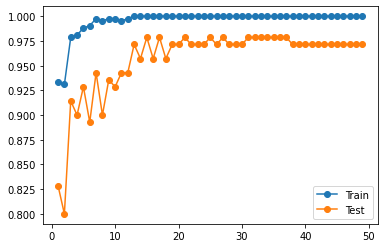

In [536]:
watch_random_forest_overfit(x_train, x_test, y_train, y_test)

In [365]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_kneighbors_overfit(x_train, x_test, y_train, y_test):
    neighbors = []
    classifiers = []

    train_scores = []
    test_scores = []

    for neighbor in range(1,50):
        kn = KNeighborsClassifier(n_neighbors=neighbor)
        kn.fit(x_train, y_train)

        # Evaluate train
        train_yhat = kn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = kn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        neighbors.append(neighbor)
        classifiers.append(kn)
    
    pyplot.plot(neighbors, train_scores, '-o', label='Train')
    pyplot.plot(neighbors, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

In [ ]:
watch_kneighbors_overfit(x_train, x_test, y_train, y_test)

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# !!! No more convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

shapes = []
activations = []
learn_rates = []
# scores = []
classifiers = []
technique = []

def watch_overfit_mlp(x_train, x_test, y_train, y_test): 
    for activation in ["logistic", "tanh", "relu"]:
        print(f"Activation = {activation}")

        for learn_rate in ["constant", "invscaling", "adaptive"]:
            print(f"Learn Rate = {learn_rate}")

            for n_layers in range(1, 6):
                print(f"# Layers = {n_layers}")

                train_scores = []
                test_scores = []
                layer_sizes = []

                for layer_size in range(4, 20):
                    shape = tuple(layer_size for _ in range(n_layers))
                    shapes.append(shape)
                    activations.append(activation)
                    learn_rates.append(learn_rate)
                    layer_sizes.append(layer_size)

                    nn = MLPClassifier(hidden_layer_sizes=shape, activation=activation, learning_rate=learn_rate, random_state=19)
                    nn.fit(x_train, y_train)

                    # Evaluate train
                    train_yhat = nn.predict(x_train)
                    train_acc = accuracy_score(y_train, train_yhat)
                    train_scores.append(train_acc)

                    # Evaluate test
                    test_yhat = nn.predict(x_test)
                    test_acc = accuracy_score(y_test, test_yhat)
                    test_scores.append(test_acc)

                    classifiers.append(nn)
                    technique.append("Multi Layer Perceptron")
                    # scores.append(nn.score(x_test, y_test))

                pyplot.plot(layer_sizes, train_scores, '-o', label='Train')
                pyplot.plot(layer_sizes, test_scores, '-o', label='Test')
                pyplot.legend()
                pyplot.show()
    

In [ ]:
watch_overfit_mlp(x_train, x_test, y_train, y_test)

In [471]:
test_query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, amount, balance, k_symbol, type, operation
    from transactions
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.amount, t.balance, t.k_symbol, t.type, t.operation,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       c2.birthday as client_birthday, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
left join dispositions d2 on a.id = d2.account_id
left join clients c2 on d2.client_id = c2.id
"""

In [472]:
with sqlite3.connect("./database_test.db") as db_test:
    test_dataset = pd.read_sql_query(sql = test_query, con = db_test)

test_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,amount,balance,k_symbol,type,operation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status,loan_id
0,971208,30276,12,2523,960728,134.8,26342.3,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
1,971208,30276,12,2523,960728,206.0,49784.4,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
2,971208,30276,12,2523,960728,214.9,42321.7,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
3,971208,30276,12,2523,960728,233.6,71735.7,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
4,971208,30276,12,2523,960728,234.7,37097.4,interest credited,credit,None,57.2,9893,4.72,0.025724,620209,None,4962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36384,980718,280440,60,4674,961105,3369.0,65408.6,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36385,980718,280440,60,4674,961105,4422.0,21292.7,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36386,980718,280440,60,4674,961105,8383.0,20382.2,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295
36387,980718,280440,60,4674,961105,11831.0,28779.8,None,withdrawal in cash,withdrawal in cash,100.0,9897,1.96,0.048239,520909,None,7295


In [473]:
# Everything except loan_duration, loan_status
test_dataset_to_scale = test_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_test_dataset = pd.DataFrame(scaler.fit_transform(test_dataset_to_scale), columns = test_dataset_to_scale.columns)

scaled_test_dataset = scaled_test_dataset.join(test_dataset['loan_id'])
scaled_test_dataset

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-0.896712,-1.025688,-0.775849,-0.198775,-0.707235,-0.752071,-0.517968,0.374496,0.568145,-0.515097,4962
1,-0.896712,-1.025688,-0.775849,-0.198775,-0.701449,0.228501,-0.517968,0.374496,0.568145,-0.515097,4962
2,-0.896712,-1.025688,-0.775849,-0.198775,-0.700726,-0.083660,-0.517968,0.374496,0.568145,-0.515097,4962
3,-0.896712,-1.025688,-0.775849,-0.198775,-0.699206,1.146713,-0.517968,0.374496,0.568145,-0.515097,4962
4,-0.896712,-1.025688,-0.775849,-0.198775,-0.699117,-0.302190,-0.517968,0.374496,0.568145,-0.515097,4962
...,...,...,...,...,...,...,...,...,...,...,...
36384,1.031461,1.042465,0.192608,-0.134573,-0.444406,0.882054,1.682797,0.377585,-0.766181,0.657532,7295
36385,1.031461,1.042465,0.192608,-0.134573,-0.358833,-0.963293,1.682797,0.377585,-0.766181,0.657532,7295
36386,1.031461,1.042465,0.192608,-0.134573,-0.036940,-1.001379,1.682797,0.377585,-0.766181,0.657532,7295
36387,1.031461,1.042465,0.192608,-0.134573,0.243264,-0.650111,1.682797,0.377585,-0.766181,0.657532,7295


In [474]:
col_names_to_encode = ["loan_duration", "type", "k_symbol", "operation"]
test_dataset_to_hotencode = test_dataset[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(test_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_test_dataset = pd.DataFrame(res.transform(test_dataset_to_hotencode), columns = columns)

hot_encoded_test_dataset


# Recreate train_dataset after preprocessing

pre_processed_test_dataframe = scaled_test_dataset.join(hot_encoded_test_dataset)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop_duplicates()
pre_processed_test_dataframe = pre_processed_test_dataframe.reset_index()
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['index'], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_k_symbol_ '], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_k_symbol_None'], axis=1)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['is_operation_None'], axis=1)

In [475]:
pre_processed_test_dataframe

,loan_date,loan_amount,loan_payments,account_creation,amount,balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,...,is_k_symbol_household,is_k_symbol_insurrance payment,is_k_symbol_interest credited,is_k_symbol_payment for statement,is_k_symbol_sanction interest if negative balance,is_operation_collection from another bank,is_operation_credit card withdrawal,is_operation_credit in cash,is_operation_remittance to another bank,is_operation_withdrawal in cash
0,-0.896712,-1.025688,-0.775849,-0.198775,-0.707235,-0.752071,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.896712,-1.025688,-0.775849,-0.198775,-0.701449,0.228501,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.896712,-1.025688,-0.775849,-0.198775,-0.700726,-0.083660,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.896712,-1.025688,-0.775849,-0.198775,-0.699206,1.146713,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.896712,-1.025688,-0.775849,-0.198775,-0.699117,-0.302190,-0.517968,0.374496,0.568145,-0.515097,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30193,1.031461,1.042465,0.192608,-0.134573,-0.444406,0.882054,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30194,1.031461,1.042465,0.192608,-0.134573,-0.358833,-0.963293,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30195,1.031461,1.042465,0.192608,-0.134573,-0.036940,-1.001379,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30196,1.031461,1.042465,0.192608,-0.134573,0.243264,-0.650111,1.682797,0.377585,-0.766181,0.657532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [476]:
amount_mean = pre_processed_test_dataframe.groupby('loan_id')['amount'].mean()
amount_max = pre_processed_test_dataframe.groupby('loan_id')['amount'].max()
amount_min = pre_processed_test_dataframe.groupby('loan_id')['amount'].min()

balance_mean = pre_processed_test_dataframe.groupby('loan_id')['balance'].mean()
balance_max = pre_processed_test_dataframe.groupby('loan_id')['balance'].max()
balance_min = pre_processed_test_dataframe.groupby('loan_id')['balance'].min()

credit_median = pre_processed_test_dataframe.groupby('loan_id')['is_type_credit'].median()
withdrawal_median = pre_processed_test_dataframe.groupby('loan_id')['is_type_withdrawal'].median()
withdrawal_in_cash_median = pre_processed_test_dataframe.groupby('loan_id')['is_type_withdrawal in cash'].median()
household_median = pre_processed_test_dataframe.groupby('loan_id')['is_k_symbol_household'].median()
insurrance_payment_median = pre_processed_test_dataframe.groupby('loan_id')['is_k_symbol_insurrance payment'].median()
interest_credited_median = pre_processed_test_dataframe.groupby('loan_id')['is_k_symbol_interest credited'].median()
payment_for_statement_median = pre_processed_test_dataframe.groupby('loan_id')['is_k_symbol_payment for statement'].median()
sanction_interest_if_negative_balance_median = pre_processed_test_dataframe.groupby('loan_id')['is_k_symbol_sanction interest if negative balance'].median()
collection_from_another_bank_median = pre_processed_test_dataframe.groupby('loan_id')['is_operation_collection from another bank'].median()
credit_card_withdrawal_median = pre_processed_test_dataframe.groupby('loan_id')['is_operation_credit card withdrawal'].median()
credit_in_cash_median = pre_processed_test_dataframe.groupby('loan_id')['is_operation_credit in cash'].median()
remittance_to_another_bank_median = pre_processed_test_dataframe.groupby('loan_id')['is_operation_remittance to another bank'].median()
op_withdrawal_in_cash_median = pre_processed_test_dataframe.groupby('loan_id')['is_operation_withdrawal in cash'].median()

features_to_copy = ["loan_date", "loan_amount", "loan_payments", "account_creation", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes", "loan_id", "is_loan_duration_12", "is_loan_duration_24", "is_loan_duration_36", "is_loan_duration_48", "is_loan_duration_60"]
processed_test_df = pre_processed_test_dataframe[features_to_copy]

processed_test_df = processed_test_df.drop_duplicates()
processed_test_df = processed_test_df.reset_index()
processed_test_df = processed_test_df.drop(['index'], axis=1)
processed_test_df = processed_test_df.set_index('loan_id')
processed_test_df['amount_mean'] = amount_mean
processed_test_df['amount_max'] = amount_max
processed_test_df['amount_min'] = amount_min
processed_test_df['balance_mean'] = balance_mean
processed_test_df['balance_max'] = balance_max
processed_test_df['balance_min'] = balance_min
processed_test_df['credit_median'] = credit_median
processed_test_df['withdrawal_median'] = withdrawal_median
processed_test_df['withdrawal_in_cash_median'] = withdrawal_in_cash_median
processed_test_df['household_median'] = household_median
processed_test_df['insurrance_payment_median'] = insurrance_payment_median
processed_test_df['interest_credited_median'] = interest_credited_median
processed_test_df['payment_for_statement_median'] = payment_for_statement_median
processed_test_df['sanction_interest_if_negative_balance_median'] = sanction_interest_if_negative_balance_median
processed_test_df['collection_from_another_bank_median'] = collection_from_another_bank_median
processed_test_df['credit_card_withdrawal_median'] = credit_card_withdrawal_median
processed_test_df['credit_in_cash_median'] = credit_in_cash_median
processed_test_df['remittance_to_another_bank_median'] = remittance_to_another_bank_median
processed_test_df['op_withdrawal_in_cash_median'] = op_withdrawal_in_cash_median

In [477]:
processed_test_df['loan_id'] = processed_test_df.index
processed_test_df

,loan_date,loan_amount,loan_payments,account_creation,ratio_urban_inhabitants,avg_salary,unemployment,crimes,is_loan_duration_12,is_loan_duration_24,...,insurrance_payment_median,interest_credited_median,payment_for_statement_median,sanction_interest_if_negative_balance_median,collection_from_another_bank_median,credit_card_withdrawal_median,credit_in_cash_median,remittance_to_another_bank_median,op_withdrawal_in_cash_median,loan_id
loan_id,,,,,,,,,,,,,,,,,,,,,
4962,-0.896712,-1.025688,-0.775849,-0.198775,-0.517968,0.374496,0.568145,-0.515097,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4962
4967,1.091476,1.356949,0.478058,1.519545,-0.456264,-0.664697,0.046017,-0.718084,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4967
4968,0.970838,-0.360510,-0.873100,1.517842,-0.749357,-0.776646,0.210391,-0.741910,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4968
4986,-0.977408,-0.425490,1.948078,-0.236752,1.682797,0.976704,0.916230,1.095565,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4986
4988,-0.897118,0.917465,1.406444,-0.269961,-0.733931,-0.890910,0.104032,-0.708258,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,-0.896104,0.011712,1.010236,1.399314,0.896075,-0.542711,1.965319,0.036836,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7279
7286,-1.115077,-0.719438,-1.069853,-1.869072,-0.816203,-0.077931,0.427944,-0.198986,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7286
7292,1.113373,1.348517,0.470404,1.501323,-0.785351,-0.942639,0.921064,-0.771716,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7292


In [478]:
target_features = processed_test_df.drop(['loan_id'], axis=1)
target_features = target_features[best_features]

target_ids = processed_test_df.loan_id

In [479]:
rf = RandomForestClassifier(n_estimators=13, random_state = 19)
rf.fit(x_train, y_train)

probabilities = rf.predict_proba(target_features)
positive_probabilities = [row[0] for row in probabilities]

In [480]:
import csv
with open("predictions/v1/random_forest_resampled_pp_finalquery_13est_fs26.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Id", "Predicted"])
    writer.writerows(zip(target_ids, positive_probabilities))